## Расчётная работа по Теории Вероятности. Вариант 19<p>Задание 1</p>

### Импорт библиотек
- NumPy - библиотека для работы с массивами, матрицами. Предоставляет статистические функции.
- SciPy - библиотека предоставляет статистические функции и поддерживает построение графиков.
- scipy.integrate для интегрирования
- scipy.stats.norm для анализа нормального распредления
- scipy.optimize.norm для оптимизации функции (минимизации)
- MatPlotLib - это пакет для визуализации данных (для построения графиков).
- Regex(re) - поддерживает использование регулярных выражений.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import re

from scipy import stats
from scipy import optimize

### Константы
n = 450 - объём выборки
</br>$a_X$ = 2.35 - математическое ожидание
</br>$\sigma^2_X$ = 6.4 - дисперсия
</br>$\gamma$ = 0.95 - доверительная вероятность
</br>$\alpha$ = 0.005 - уровень значимости

In [104]:
n = 450
MX = 2.35
DX = 6.4
S = np.sqrt(DX) # Среднее квадратичное отклонение
SEED = 0        # Начальное значение для получения предсказуемой последовательности случайных чисел

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-a)^{2}}{2\sigma^{2}}}$ - Функция нормального распределения случайной величины (1)</br></br>
Сгенерируем выборку и выведем первые 10 значений случайной величины:

In [105]:
x: np.ndarray = stats.norm.rvs(loc=MX, scale=S, size=n, random_state=SEED)
print(f"{str(x[:10])[1:-1]}...")

 6.81273866  3.36232656  4.82603301  8.0190612   7.07458953 -0.12233921
  4.7535547   1.96709319  2.08887466  3.38874118...


### 1.1 Построить гистограмму распределения</br> и изобразить её графически одновременно с теоретической плотностью вероятностей.

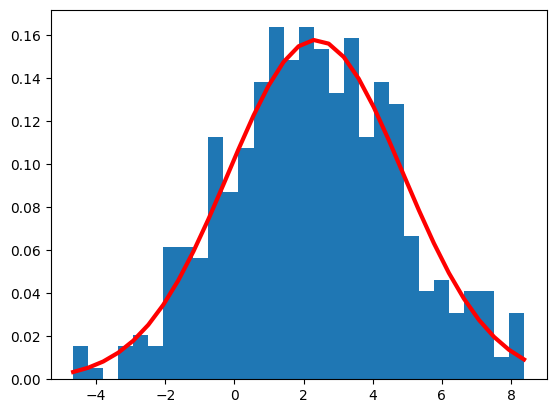

In [106]:
_, intervals_x, _ = plt.hist(x, 30, density=True) # Построение гистограммы по имеющимся значениям X 

theoretic_y = 1 / (S * np.sqrt(2 * np.pi)) * np.exp(- (intervals_x - MX)**2 / (2 * S**2)) # Вычисление функции нормального распределения по формуле (1)

plt.plot(intervals_x, theoretic_y, linewidth=3, color='r')
plt.show()

### 1.2 Вычислить выборочное среднее и выборочную дисперсию</br>
Выборочное среднее: 
$\bar{x} = \frac{1}{n}\sum_{i=0}^{n-1}x_{i}$

In [107]:
average = x.sum() / n

Выборочная дисперсия: $S^2 = \frac{1}{n}\sum_{i=0}^{n-1}(x_{i}-\bar{x})^2$

In [108]:
sumT = 0
for i in range(n):
    sumT += (x[i] - average) ** 2

print(f"Выборочное среднее: {average}\nВыборочная дисперсия: {sumT / n}")

Выборочное среднее: 2.2773128574414394
Выборочная дисперсия: 6.160497636072116


### 1.3 Найти оценки математического ожидания и дисперсии </br>методом максимального правдоподобия. Указать несмещённую оценку дисперсии.

Функция правдоподобия: $L(x_1,...,x_n; \theta) = f(x_1; \theta) * ... * f(x_n; \theta)$ </br>
Оценка максимального правдоподобия: $L(x_1,...,x_n;\hat{\theta}) = maxL(x_1,...,x_n; \theta)$ </br></br>
Для мат.ожидания:

In [109]:
def plausibility(x, params):
    return stats.norm.logpdf(x, loc=params[0], scale=params[1]).sum()

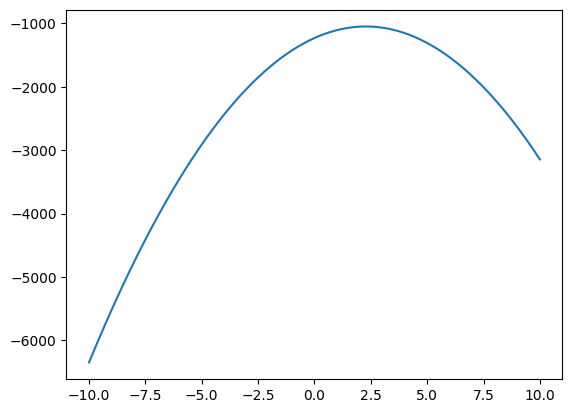

In [110]:
x_axis = np.linspace(-10, 10, 1000)
y_axis = [plausibility(x, [val, S]) for val in np.linspace(-10, 10, 1000)]
plt.plot(x_axis, y_axis)
plt.show()

Для дисперсии:

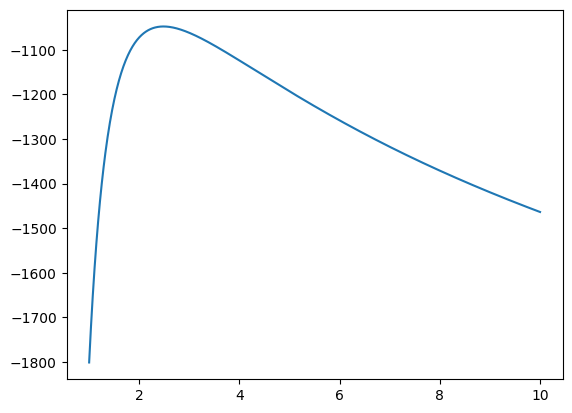

In [111]:
x_axis = np.linspace(1, 10, 1000)
y_axis = [plausibility(x, [MX, val]) for val in np.linspace(1, 10, 1000)]
plt.plot(x_axis, y_axis)
plt.show()

Инверсируем функции для нахождения минимального значения с помощью функции минимизации

In [112]:
def negative_MX(MX):
    return -1 * plausibility(x,[MX, S])

def negative_S(S):
    return -1 * plausibility(x, [MX, S])

Найдём оценки мат. ожидания и дисперсии:

In [115]:
est_MX = optimize.minimize(negative_MX, 10).x
est_S = optimize.minimize(negative_S, 1).x
print(f"Оценка мат. ожидания: {str(est_MX)[1:-1]}\nОценка дисперсии: {str(est_S ** 2)[1:-1]}")

Оценка мат. ожидания: 2.27731281
Оценка дисперсии: 6.16578113


Несмещённая оценка дисперсии: $S'^{2}=\frac{1}{n-1}\sum^{n}_{i=1}(X_i-\bar{X})^2=\frac{n}{n-1}S^2$</br>
Где $S^2$ - выборочная дисперсия

In [116]:
unb_est = (n * sumT / n) / (n - 1)
print(f"Несмещенная оценка дисперсии: {unb_est}")

Несмещенная оценка дисперсии: 6.174218120784971


### 1.4 Построить доверительные интервалы для математического ожидания и дисперсии,</br> соответствующие доверительной вероятности и $\gamma$</br>
### 1) Интервальная оценка MX при известной DX:</br> $\Delta_{\gamma}(\theta)=(\bar{X}-c_{(1+\gamma)/2}\frac{\sigma}{\sqrt{n}},\bar{X}+c_{(1+\gamma)/2}\frac{\sigma}{\sqrt{n}})$</br></br>
$c_{(1+\gamma)/2}$ - такое значение функции Лапласа $Ф(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-u^2/2}du$,</br> при котором $Ф(c_{(1+\gamma)/2})=(1+\gamma)/2$<br/></br>$c_{(1+\gamma)/2}$ найти из таблицы</br></br>
$Ф(c_{(1+\gamma)/2})=0.975$</br>
$c_{(1+\gamma)/2}=1.960$</br></br>


In [118]:
MX1 = average - 1.960 * (S / np.sqrt(n)), average + 1.960 * (S / np.sqrt(n))

print(f"Интервальная оценка MX при известной DX: {MX1}")

Интервальная оценка MX при известной DX: (2.0435692181934613, 2.5110564966894175)


### 2) Интервальная оценка MX при неизвестной DX:
$\displaystyle
\Delta_{\gamma}(\theta)=\Big( \bar{X} - t_{(1+\gamma)/2;n-1} \frac S{\sqrt{n-1}};
\quad \bar{X} + t_{(1+\gamma)/2;n-1} \frac S{\sqrt{n-1}} \Big)$

$t_{(1+\gamma)/2;n-1}$ - квантиль распределения Стьюдента</br></br>
Так как $n \ge 30$, то $t_{(1+\gamma)/2;n-1} \approx c_{(1+\gamma)/2}$</br></br>
$\displaystyle\Delta_{\gamma}(\theta)=\Big( \bar{X} - c_{(1+\gamma)/2} \frac S{\sqrt{n-1}};
\quad \bar{X} + c_{(1+\gamma)/2} \frac S{\sqrt{n-1}} \Big)$</br></br>
S = $\sqrt{S^2}$, где $S^2$ - выборочная дисперсия

In [119]:
MX2 = (average - 1.960 * (np.sqrt(sumT / n) / np.sqrt(n - 1)), average + 1.960 * (np.sqrt(sumT / n) / np.sqrt(n - 1)))
print(f"Интервальная оценка MX при неизвестной DX: {MX2}")

Интервальная оценка MX при неизвестной DX: (2.0477292907976015, 2.5068964240852774)


### 3) Интервальная оценка DX при известном MX:
$\Delta_{\gamma}(\theta^2)=\Big(\frac{\sum_{i=1}^{n}(X_i-a)^2}{\chi^2_{(1+\gamma)/2;n}};\frac{\sum_{i=1}^{n}(X_i-a)^2}{\chi^2_{(1-\gamma)/2;n}}\Big)$</br></br>
$\chi^2_{(1+\gamma)/2;n}$ - это $(1+\gamma)/2$ квантили распределения $\chi^2(n)$ с *n* степенями свободы<br/></br>
Так как $n\ge30$ ($n=450$), то $\chi^2_{\gamma,n}\approx\frac{(c_p+\sqrt{2n-1})^2}{2}$</br></br>
где $c_p$ квантиль нормального распределения<br/>
$c_p=1.960 \quad \text{(при} \> p=(1+\gamma)/2=0.975\text{)}$</br>
$c_p=-1.960 \quad \text{(при} \> p=(1-\gamma)/2=0.025\text{)}$</br><br/>
Тогда:</br>
$\chi^2_{(1+\gamma)/2;n}\approx510.18812$</br>
$\chi^2_{(1-\gamma)/2;n}\approx392.65348$

In [120]:
sum_t = 0

for i in range(n):
    sum_t += (x[i] - MX) ** 2

DX1 = sum_t / 510.18812, sum_t / 392.65348

print(f"Интервальная оценка DX при известном MX: {DX1}")

Интервальная оценка DX при известном MX: (5.438389030980278, 7.066285202780961)


### 4) Интервальная оценка DX при неизвестном MX:</br>
$\displaystyle
\Delta_{\gamma}(\theta^2) = \Big( \frac{nS^2}{\chi^2_{(1+\gamma)/2;n-1}};
\quad \frac{nS^2}{\chi^2_{(1-\gamma)/2;n-1}} \Big)$</br>
$S^2$ - выборочная дисперсия</br>
<br/>$\chi^2_{(1+\gamma)/2;n-1}$ - это $(1+\gamma)/2$ квантили распределения $\chi^2(n)$ с *n* степенями свободы<br/>
</br>Так как $n \ge 30$</br>
$\displaystyle
\Delta_{\gamma}(\theta^2) = \Big( \frac{nS^2}{n-1+c_{(1+\gamma)/2}\sqrt{2(n-1)}};
\quad \frac{nS^2}{n-1-c_{(1+\gamma)/2}\sqrt{2(n-1)}} \Big)
$</br>

In [121]:
DX2 = ((n * sumT / n) / (n - 1 + 1.645 * np.sqrt(2 * (n - 1))), (n * sumT / n) / (n - 1 - 1.645 * np.sqrt(2 * (n - 1))))
print(f"Интервальная оценка DX при неизвестном MX: {DX2}")

Интервальная оценка DX при неизвестном MX: (5.563417611380687, 6.9356772636376816)


### 1.5 Проверить гипотезу о нормальном распределении случайной величины X,</br> используя критерий $\chi^2$ Пирсона при уровне значимости $\alpha$

In [122]:
sequence = x.copy()
sequence.sort()
print(f"Вариационный ряд: {re.sub(" +", ", ", str(sequence[:6])[1:-1])}...")

Вариационный ряд: -4.66416651, -4.58089592, -4.37723277, -4.10861013, -3.3561763, -3.27481449...


In [123]:
print(f"Минимальное значение в ряде: {min(sequence)}")
print(f"Максимальное значение в ряде: {max(sequence)}")

Минимальное значение в ряде: -4.664166507514132
Максимальное значение в ряде: 8.378932385999397


Кол-во интервалов, $N = [1+3.32 \lg n] + 1 = 10$

In [124]:
N = 10

$h=\frac{x_{max}-x_{min}}{N}$ - длина интервалов

In [125]:
h = (max(sequence) - min(sequence)) / N
print(f"Длина интервала: {h}")

Длина интервала: 1.304309889351353


In [126]:
intervals = [[min(sequence) + i * h, min(sequence) + (i + 1) * h] for i in range(N)]

for (i, interval) in enumerate(intervals):
    print(f"Интервал {i + 1}: {str(interval)[:-1]})")

Интервал 1: [-4.664166507514132, -3.359856618162779)
Интервал 2: [-3.359856618162779, -2.055546728811426)
Интервал 3: [-2.055546728811426, -0.751236839460073)
Интервал 4: [-0.751236839460073, 0.5530730498912799)
Интервал 5: [0.5530730498912799, 1.8573829392426333)
Интервал 6: [1.8573829392426333, 3.161692828593986)
Интервал 7: [3.161692828593986, 4.466002717945338)
Интервал 8: [4.466002717945338, 5.770312607296692)
Интервал 9: [5.770312607296692, 7.074622496648045)
Интервал 10: [7.074622496648045, 8.378932385999398)


Занесём значения из вариационного ряда в соответствующие интервалы:

In [127]:
filled_int = [[] for _ in range(len(intervals))]

for value in sequence:
    for i in range(len(intervals)):
        if (intervals[i][0] <= value < intervals[i][1]):
            filled_int[i].append(value)
filled_int[-1].append(max(sequence))

In [128]:
frequencies = []

for interval in filled_int:
    frequencies.append(len(interval))

print(f"Частоты: {frequencies}")

Частоты: [4, 10, 35, 60, 88, 88, 80, 46, 23, 17]


### Критерий Пирсона при известных MX и DX:</br></br>
$\chi^2_n=\sum^N_{k=1}\frac{(\nu_k-n p_k)^2}{n p_k}$</br></br>
$p_k = F(u_k)-F(u_{k-1})$</br></br>
$\displaystyle F(x) = \frac 12 \Big[ 1 + \text{erf}\Big(\frac {x - \mu}{\sigma \sqrt 2}\Big) \Big]$</br></br>
$\displaystyle \text{erf}(x) = \frac 2{\sqrt \pi} \int^x_0 e^{-t^2} dt$

Функция F(x):

In [129]:
def erf(x):
    return (2 / np.sqrt(np.pi)) * integrate.quad(lambda t: np.exp(- t**2), 0, x)[0]

def F(x, MX, S):
    return 0.5 * (1 + erf((x - MX) / (S * np.sqrt(2))))

Вероятность $p_k$:

In [130]:
p = [F(val[-1], MX, S) - F(val[0], MX, S) for val in intervals]

for (k, pk) in enumerate(p):
    print(f"p{k + 1} = {pk}")

p1 = 0.009222860282918355
p2 = 0.028799337468773722
p3 = 0.06932073705337777
p4 = 0.12863624108623795
p5 = 0.18404475545306476
p6 = 0.203033362026813
p7 = 0.17270377920793933
p8 = 0.11327024949473175
p9 = 0.05727715015754231
p10 = 0.02232822331821993


In [131]:
chi = 0
for k in range(N):
    chi += (frequencies[k] - n * p[k])**2 / n * p[k]
print(f"Критерий Пирсона: {chi}")

Критерий Пирсона: 0.03175235027695021


Порог для $\chi^2_{1-\alpha;N-1}$:</br></br>
$1-\alpha=1-0.005=p=0.995$</br></br>
$N-1=9$</br></br>
$\chi^2_{1-\alpha;N-1}=23.589$</br></br>
Так как: $\chi^2 < \chi^2_{1-\alpha;N-1} \Leftrightarrow 0.0317 < 23.589 \Rightarrow \text{Гипотеза принимается}$</br></br>
### Критерий Пирсона при неизвестных MX и DX:</br>
MX и DX заменяем на их точечные оценки (Из метода максимального правдоподобия)</br></br>

In [132]:
p = [F(val[-1], est_MX, est_S) - F(val[0], est_MX, est_S) for val in intervals]

for (k, pk) in enumerate(p):
    print(f"p{k + 1} = {pk}")

p1 = 0.009006209925199238
p2 = 0.02890037248627081
p3 = 0.07079826644344284
p4 = 0.1324228560679223
p5 = 0.18913424471818296
p6 = 0.20628653986284123
p7 = 0.17181918708062183
p8 = 0.10928453846459218
p9 = 0.05307603998962929
p10 = 0.0196806216289791


In [133]:
chi = 0
for k in range(N):
    chi += (frequencies[k] - n * p[k])**2 / n * p[k]
print(f"Критерий Пирсона: {chi}")

Критерий Пирсона: 0.02457114703909801


Порог для $\chi^2_{1-\alpha;N-1}$:</br></br>
$1-\alpha=1-0.005=p=0.995$</br></br>
$N-1-r=7  \text{ (r = 2 - число неизвестных параметров)}$</br></br>
$\chi^2_{1-\alpha;N-1-r}=20.278$</br></br>
Так как $\chi^2 < \chi^2_{1-\alpha;N-1-r} \Leftrightarrow 0.025 < 20.278 \Rightarrow \text{Гипотеза принимается}$